# Gyroscope Environment Testbed for environment with integral term

## 1. Test Environment Class

## 1.1 Import and Load Environment

In [1]:
import gym
from gym import spaces
from gym.utils import seeding
import numpy as np
from os import path
from scipy.integrate import solve_ivp

import gym_gyroscope_env
import spinup
import torch
from functools import partial

from custom_functions.custom_functions import env_fn 
from custom_functions.custom_functions import create_env
from custom_functions.custom_functions import load_agent
from custom_functions.custom_functions import test_agent
from custom_functions.custom_functions import plot_test

import matplotlib.pyplot as plt
%matplotlib inline

## 1.2 Initialize the Environment

In [2]:
# Initialization args
env_name = 'GyroscopeIntegralEnv-v0'
simu_args = {
    'dt': 0.05,
    'ep_len': 100,
    'seed': 2
}
reward_func = 'Quadratic'
reward_args = {
    'qx1': 9, 
    'qx2': 0.05, 
    'qx3': 9, 
    'qx4': 0.05, 
    'pu1': 0.1, 
    'pu2': 0.1
}
env = create_env(env_name,simu_args,reward_func,reward_args,state=None)
# env_fn = partial(env_fn, env_name, simu_args = simu_args, reward_func = reward_func, reward_args = reward_args)

## 1.3 Run the Test with Simply Input

In [3]:
# Set initial state
x_0 = [0.5, 0.2, 0.5, 0, 0, 0, 200 * 2 * np.pi / 60, 0, 0]
observation = env.reset(x_0)

time = np.arange(0, 10, env.dt)
state_record = np.empty([len(time), len(x_0)])
reward_record = np.empty([len(time), 1])
action_record = np.empty([len(time), 2])

for i in range(len(time)):
    action = [0,0] 
    
    observation, reward, done, info = env.step(action)
    state_record[i] = env.state
    reward_record[i] = reward
    action_record[i] = action

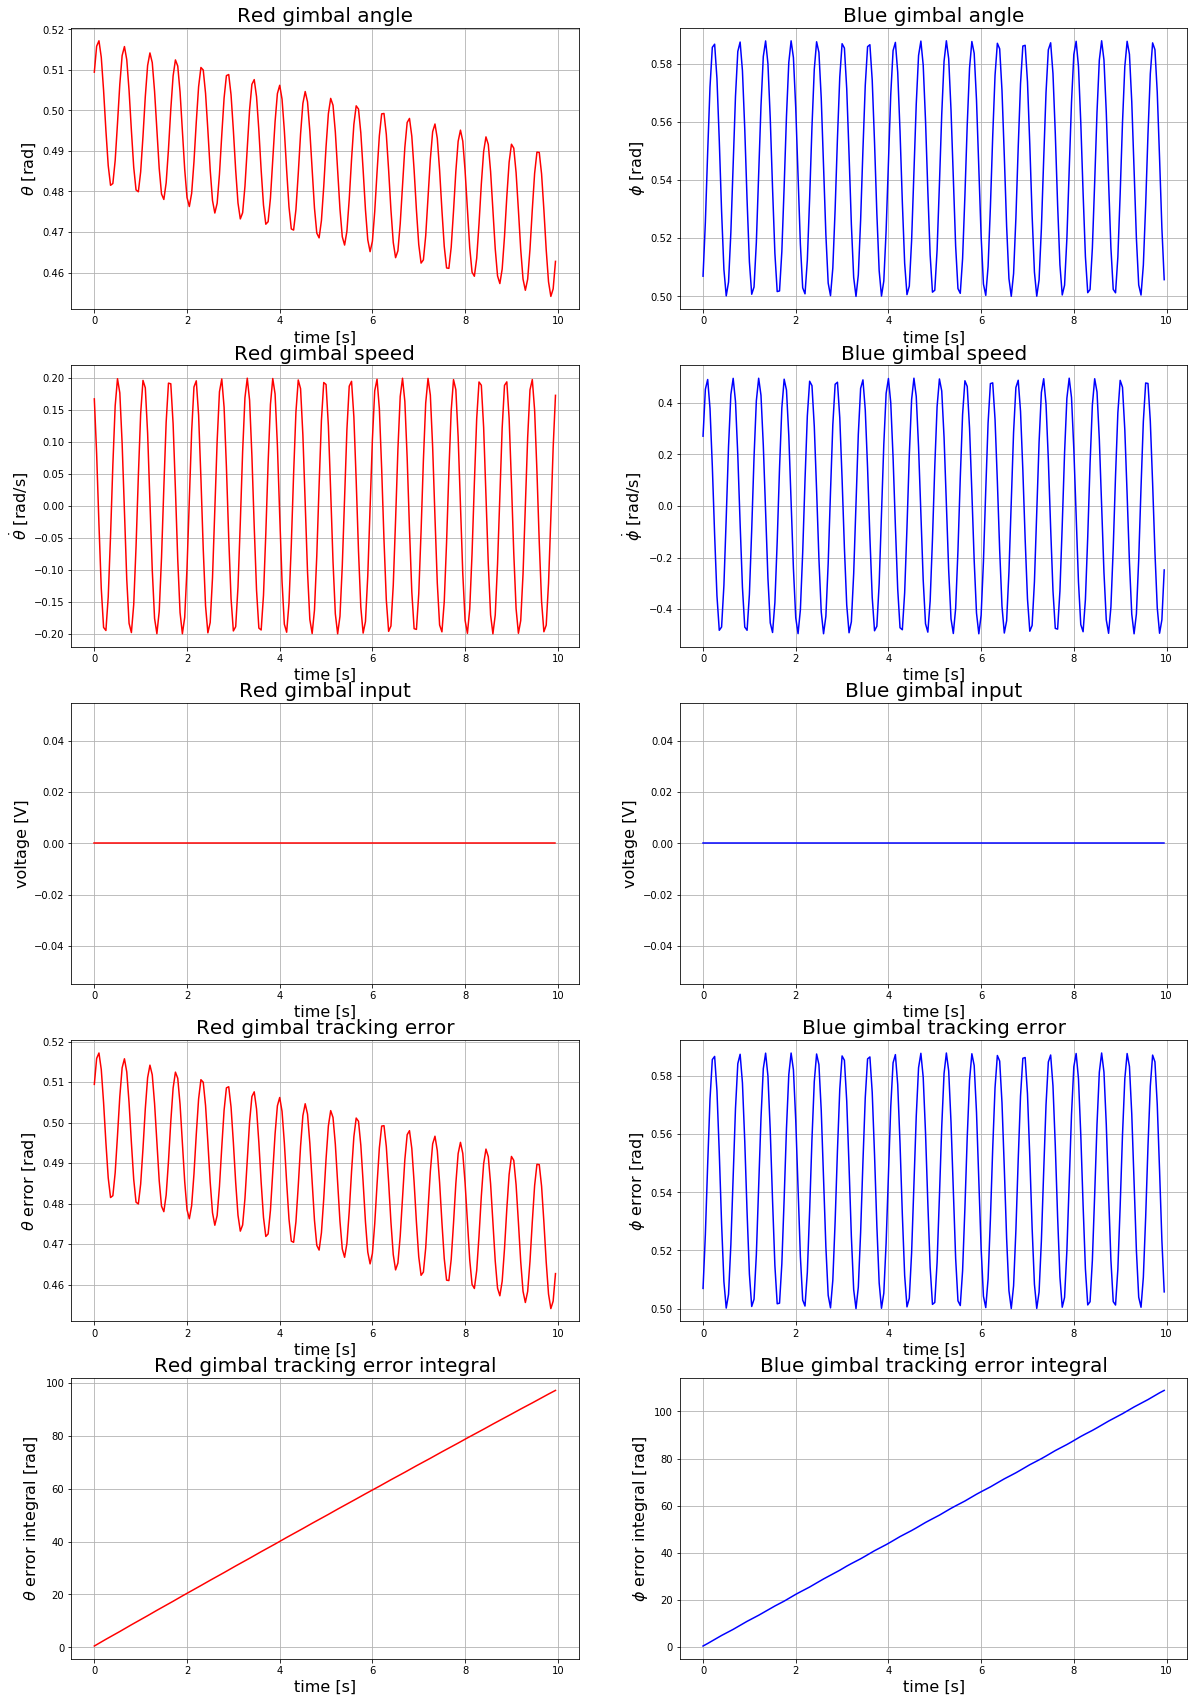

In [4]:
f, axs = plt.subplots(5,2,figsize=(20,30))

plt.subplot(5,2,1)
plt.title('Red gimbal angle',fontsize=20)
plt.xlabel('time [s]',fontsize=16)
plt.ylabel(r'$\theta$ [rad]',fontsize=16)
plt.grid()
plt.plot(time,state_record[:,0],'r-')

plt.subplot(5,2,2)
plt.title('Blue gimbal angle',fontsize=20)
plt.xlabel('time [s]',fontsize=16)
plt.ylabel(r'$\phi$ [rad]',fontsize=16)
plt.grid()
plt.plot(time,state_record[:,2],'b-')

plt.subplot(5,2,3)
plt.title('Red gimbal speed',fontsize=20)
plt.xlabel('time [s]',fontsize=16)
plt.ylabel(r'$\dot \theta$ [rad/s]',fontsize=16)
plt.grid()
plt.plot(time,state_record[:,1],'r-')

plt.subplot(5,2,4)
plt.title('Blue gimbal speed',fontsize=20)
plt.xlabel('time [s]',fontsize=16)
plt.ylabel(r'$\dot \phi$ [rad/s]',fontsize=16)
plt.grid()
plt.plot(time,state_record[:,3],'b-')

plt.subplot(5,2,5)
plt.title('Red gimbal input',fontsize=20)
plt.xlabel('time [s]',fontsize=16)
plt.ylabel('voltage [V]',fontsize=16)
plt.grid()
plt.plot(time,action_record[:,0]*10,'r-')

plt.subplot(5,2,6)
plt.title('Blue gimbal input',fontsize=20)
plt.xlabel('time [s]',fontsize=16)
plt.ylabel('voltage [V]',fontsize=16)
plt.grid()
plt.plot(time,action_record[:,1]*10,'b-')

plt.subplot(5,2,7)
plt.title('Red gimbal tracking error',fontsize=20)
plt.xlabel('time [s]',fontsize=16)
plt.ylabel(r'$\theta$ error [rad]',fontsize=16)
plt.grid()
plt.plot(time,state_record[:,0]-state_record[:,4],'r-')

plt.subplot(5,2,8)
plt.title('Blue gimbal tracking error',fontsize=20)
plt.xlabel('time [s]',fontsize=16)
plt.ylabel(r'$\phi$ error [rad]',fontsize=16)
plt.grid()
plt.plot(time,state_record[:,2]-state_record[:,5],'b-')

plt.subplot(5,2,9)
plt.title('Red gimbal tracking error integral',fontsize=20)
plt.xlabel('time [s]',fontsize=16)
plt.ylabel(r'$\theta$ error integral [rad]',fontsize=16)
plt.grid()
plt.plot(time,state_record[:,7],'r-')

plt.subplot(5,2,10)
plt.title('Blue gimbal tracking error integral',fontsize=20)
plt.xlabel('time [s]',fontsize=16)
plt.ylabel(r'$\phi$ error integral [rad]',fontsize=16)
plt.grid()
plt.plot(time,state_record[:,8],'b-')

plt.show()

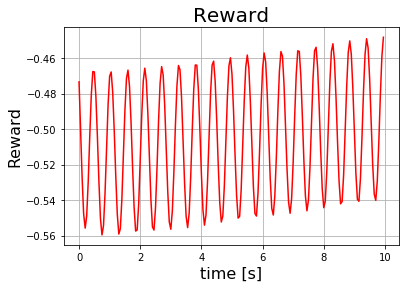

In [5]:
plt.title('Reward',fontsize=20)
plt.xlabel('time [s]',fontsize=16)
plt.ylabel('Reward',fontsize=16)
plt.grid()
plt.plot(time,reward_record,'r-')